# 🎥 Netflix Dataset Analysis

![img](https://nadiaespallargas.es/wp-content/uploads/2019/06/netflix-banner-2.jpg)

# TABLE OF CONTENTS

1. [Abount the Company](#🎥-About-the-Company)
2. [Objective](#🎥-Objective)
3. [About the Dataset](#🎥-About-the-Dataset)
4. [Importing libraries](#🎥-Importing-libraries)
5. [Loading the dataset](#🎥-Loading-the-dataset)
6. [Descriptive Data Analysis and Data Cleaning](#🎥-Descriptive-Data-Analysis-and-Data-Cleaning)
7. [Exploratory Data Analysis and Visualizations](#🎥-Exploratory-Data-Analysis-and-Visualizations)
8. [Summary and Conclusion](#🎥-Summary-and-Conclusion)

# 🎥 About the Company

**Netflix** is an American subscription-based streaming service that allows members to watch TV shows and movies on an internet-connected device. Depending on your plan, you can also download TV shows and movies to your iOS, Android, or Windows 10 device and watch without an internet connection. The service primarily distributes original and acquired films and television shows from various genres, and it is available internationally in multiple languages. Netflix was founded in 1997 by American entrepreneurs Reed Hastings and Marc Randolph. It has since grown to become the most-subscribed video on demand streaming media service, with millions of paid memberships in more than 190 countries.

# 🎥 About the Dataset
The raw data is Web Scrapped through Selenium. It contains Unlabelled text data of around 9000 Netflix Shows and Movies along with Full details like Cast, Release Year, Rating, Description, etc.

## Data Dictionary

| Columns | Description |
| --- | --- |
|show_id|Id of the show|	
|type|Type of content whether TV-Show or Movie|
|title|	Title of the content|
|director|	Director of the content|
|cast|	Cast of the TV-Show/Movie|
|country| Country of release|
|date_added| date on which the TV-Show/Movie was added|	
|release_year|	Year of release|
|rating|Category of rating of the TV-Show/Movie|	
|duration|	Duretion of the TV-Show/Movie|
|listed_in|	Platforms released in |
|description| Descriptin of the TV-Show/Movie|

# 🎥 Objective

The objective of this project is to understand the distribution and trends of content on Netflix, including the number of movies vs TV shows, premiere years, countries of origin, ratings, genres, and contributions by directors.

# 🎥 Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')

# 🎥 Loading the dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')

# 🎥 Descriptive Data Analysis and Data Cleaning

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [7]:
# Checking for null value count
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# Handling the missing values
df.fillna({'director':'missing', 'cast':'missing', 'country':'unavailable', 'date_added':'unavailable', 
               'rating':'unavailable', 'duration':'unavailable'}, inplace=True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# Change the date_added column to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [10]:
# Adding month and date columns
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year

In [11]:
df['year'].head()

0    2021.0
1    2021.0
2    2021.0
3    2021.0
4    2021.0
Name: year, dtype: float64

In [12]:
# Removing the row with nan values in the year, type and month columns 
df.dropna(subset = ['year', 'month', 'type'], inplace=True)

In [13]:
df.shape

(8797, 14)

In [14]:
df['month'].unique()

array([ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 12., 11., 10.])

In [15]:
df['year'].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008., 2010.])

In [16]:
# Changing the datatypw of `month & `year` columns
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [17]:
df['year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2009, 2008, 2010])

In [18]:
# renaming the column listed_in in to Genre
# then only showing the first Genre in Genre column

df = df.rename(columns={'listed_in':'genre'})
df['genre'] = df['genre'].str.split(',').str[0]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,missing,missing,unavailable,2021-09-24,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,9,2021


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  genre         8797 non-null   object        
 11  description   8797 non-null   object        
 12  month         8797 non-null   int32         
 13  year          8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 962.2+ KB


In [20]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month,year
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,Cult Movies,"A political cartoonist, a crime reporter and a...",11,2019
8803,s8804,TV Show,Zombie Dumb,missing,missing,unavailable,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g...",7,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,11,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",1,2020
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,3,2019


In [21]:
df.shape

(8797, 14)

In [22]:
# Checking for duplicate values
df.duplicated().any()

False

# 🎥 Exploratory Data Analysis and Visualizations

## How many Movies and TV Shows are in the dataset

In [23]:
counts = df['type'].value_counts()
percentage = round(df['type'].value_counts(normalize=True),2)
table = pd.DataFrame({'Count': counts, 'Percentage':percentage})
table

,Count,Percentage
Movie,6131,0.7
TV Show,2666,0.3


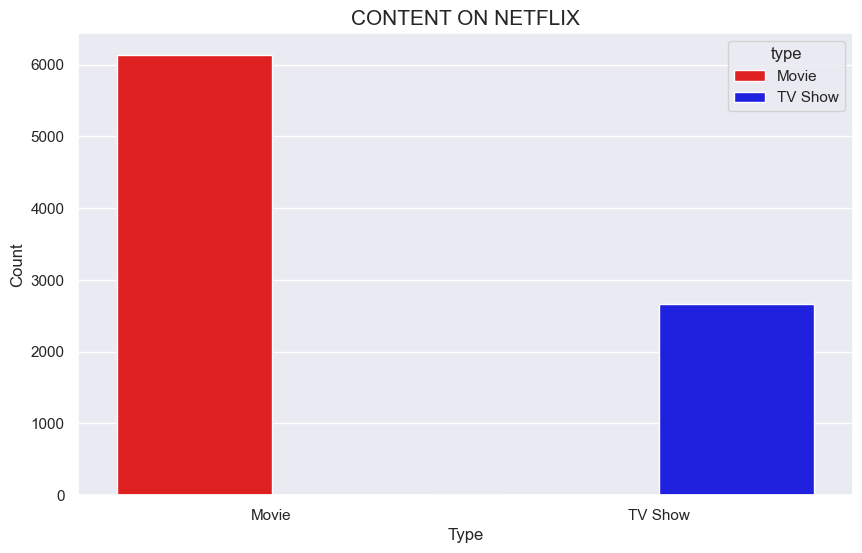

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x='type', hue = 'type', palette = ['Red', 'Blue'])
plt.title('CONTENT ON NETFLIX', size = 15)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

The Number of Movies is quite high as compared to TV Shows

## Yearwise Count of Shows

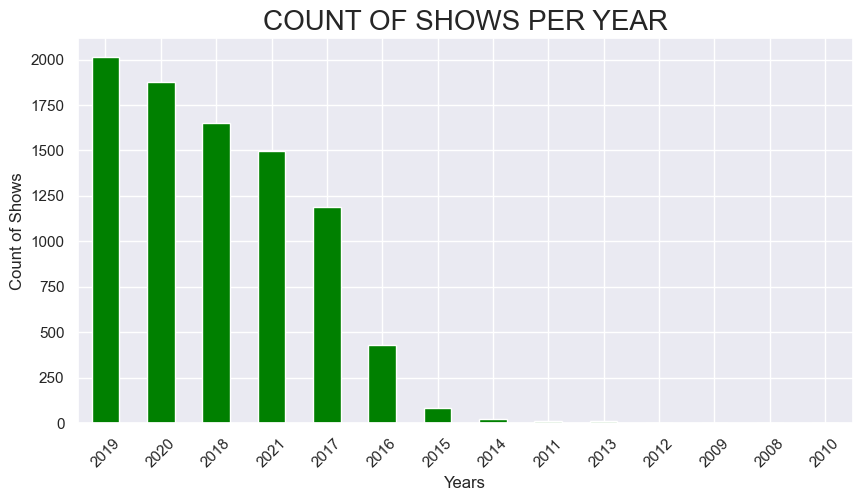

In [25]:
plt.figure(figsize=(10,5))
ax = df['year'].value_counts() \
                .plot(kind='bar', color = 'Green')
ax.set_title('COUNT OF SHOWS PER YEAR', size = 20)
ax.set_ylabel('Count of Shows')
ax.set_xlabel('Years')
plt.xticks(rotation = 45)
plt.show()    

- It is clear from the barplot above that the highest number of shows aired in the year `2019` followed by `2020` then `2018`

## Yearwise Count of each kind of Shows

In [26]:
grouped_data_year = df.groupby(["year", "type"]).size().reset_index(name='count')
type_per_year= grouped_data_year.pivot(index='year', columns='type', values='count').reset_index()
type_per_year.columns.name = None 
type_per_year = type_per_year.fillna(0)
type_per_year

,year,Movie,TV Show
0,2008,1.0,1.0
1,2009,2.0,0.0
2,2010,1.0,0.0
3,2011,13.0,0.0
4,2012,3.0,0.0
5,2013,6.0,5.0
6,2014,19.0,5.0
7,2015,56.0,26.0
8,2016,253.0,176.0
9,2017,839.0,349.0


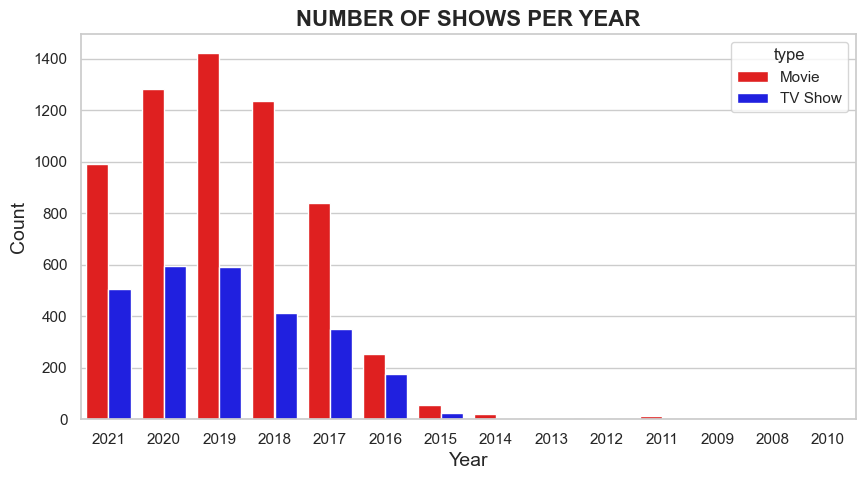

In [27]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
sns.countplot(data=df, x='year', hue='type', palette = ['Red', 'Blue'], order = df['year'].unique())
plt.title("NUMBER OF SHOWS PER YEAR", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

- The highest number of `Movies` premiered in 2019(1424) and `TV Shows` in 2020 (594)

# Count of Shows by Month

In [28]:
df['month'] = df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
                                   6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                                   11:'Nov', 12:'Dec'})

In [29]:
monthly_count = df['month'].value_counts()
monthly_count

Jul    827
Dec    813
Sep    770
Apr    764
Oct    760
Aug    755
Mar    742
Jan    738
Jun    728
Nov    705
May    632
Feb    563
Name: month, dtype: int64

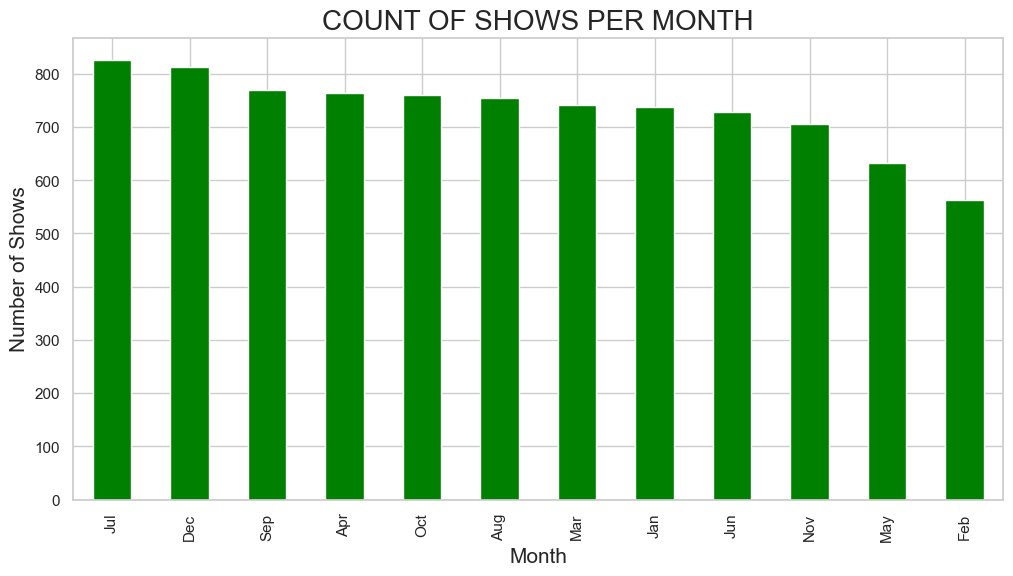

In [30]:
plt.figure(figsize=(12,6))
ax = monthly_count.plot(kind='bar', color='Green')
ax.set_title('COUNT OF SHOWS PER MONTH', fontsize=20)
ax.set_xlabel('Month', size=15)
ax.set_ylabel('Number of Shows', size=15)
plt.show()

## Types of Shows W.R.T Month

In [31]:
grouped_data_month = df.groupby(['month', 'type']).size().reset_index(name='count')
type_per_month = grouped_data_month.pivot(index='month', columns='type', values='count').reset_index()
type_per_month.columns.name = None
type_per_month

,month,Movie,TV Show
0,Apr,550,214
1,Aug,519,236
2,Dec,547,266
3,Feb,382,181
4,Jan,546,192
5,Jul,565,262
6,Jun,492,236
7,Mar,529,213
8,May,439,193
9,Nov,498,207


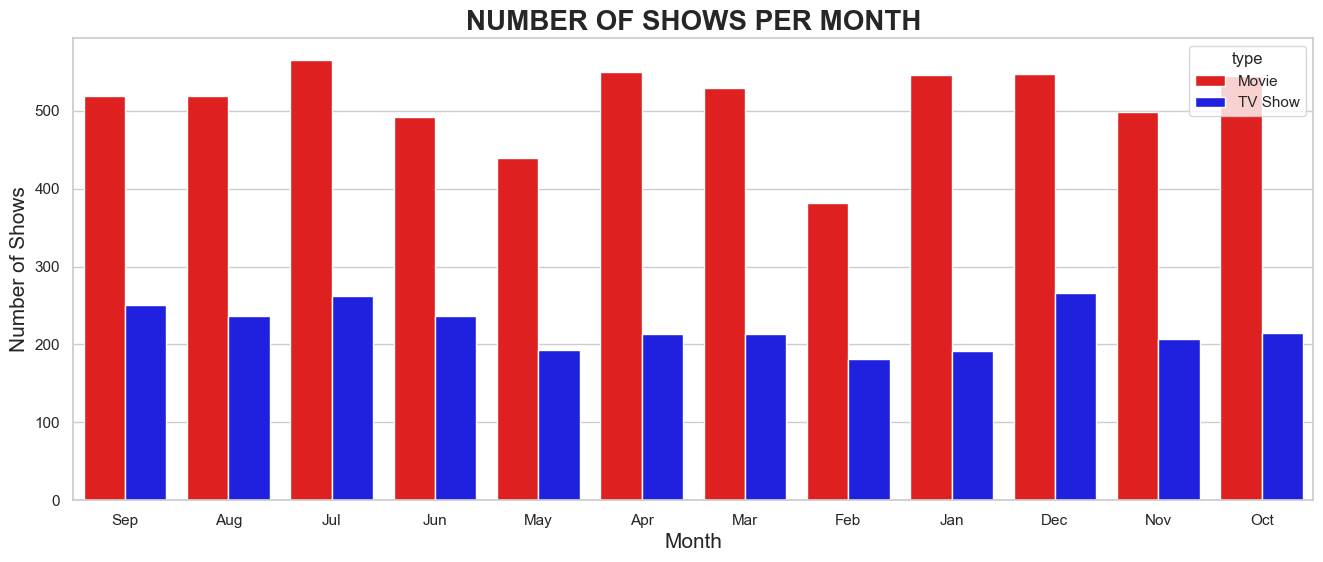

In [32]:
plt.figure(figsize=(16,6))
sns.countplot(data = df, x='month', hue='type', palette = ['Red', 'Blue'])
plt.title('NUMBER OF SHOWS PER MONTH', size = 20, fontweight = 'bold')
plt.xlabel('Month', size=15)
plt.ylabel('Number of Shows', size=15)
plt.show()

- The highest number of Movies premiered in Month `July(565)` and TV Shows also In Month `July(254)`.

## Top 10 countries with the highest Netflix Content

In [33]:
top_country = df['country'].value_counts()[:10]
top_country

United States     2812
India              972
unavailable        830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

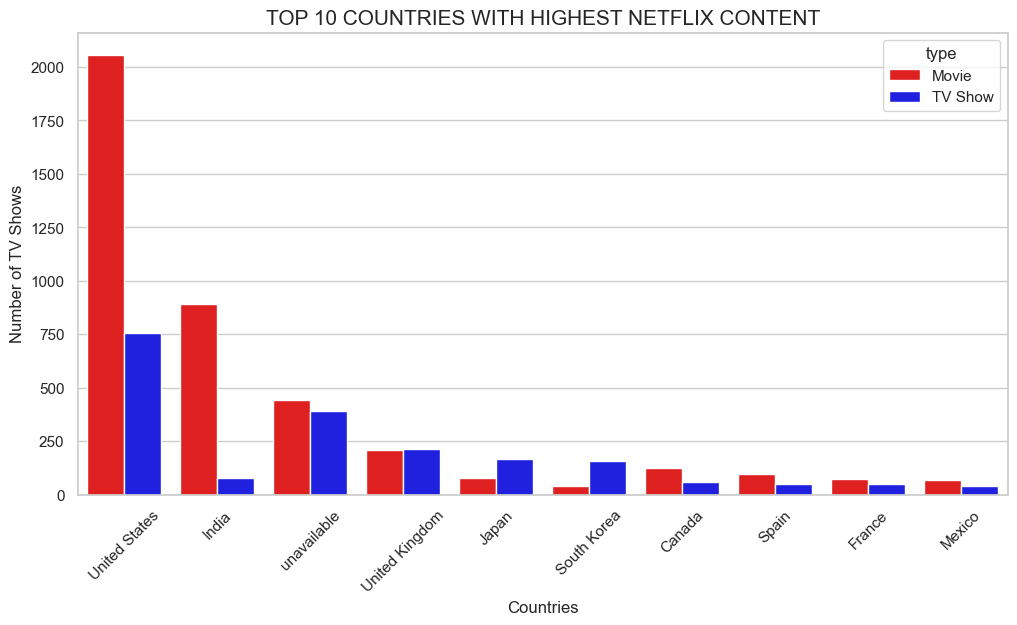

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, order=df["country"].value_counts().index[0:10], x='country', hue='type', palette=['Red','Blue'])
plt.title('TOP 10 COUNTRIES WITH HIGHEST NETFLIX CONTENT', size=15)
plt.xlabel('Countries')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.show()

- The highest number of shows are from `USA`, followed by `India`.

## Top 10 Distribution of Netflix Media in terms of Rating

In [35]:
ratings = df['rating'].value_counts().head(10)
ratings.to_frame(name= 'Counts')

,Counts
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220
NR,79


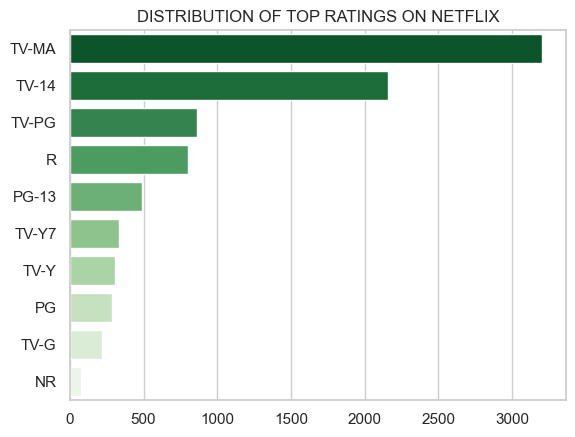

In [36]:
sns.barplot(y=ratings.index, x=ratings.values, palette = 'Greens_r')
plt.title('DISTRIBUTION OF TOP RATINGS ON NETFLIX')
plt.show()

- `TV MA` rating which is a rating the Federal Communications Commission (FCC) requires the television industry to assign to TV programs and series for mature audiences only, has the highest distribution.
- `TV-14` which is the second highest rating in Netflix are programs, are acceptable for people over 14.
- `R` or `R-rated` is given to movies appropriate for people 17 and older. It holds third place in the distribution of Netflix's programs.

## Highest Premired Genre on Netflix

In [37]:
genre_count = df['genre'].value_counts()
genre_count

Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           773
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         386
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 252
Docuseries                       220
Anime Series                     175
International Movies             128
Reality TV                       120
TV Comedies                      119
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 20
Music & Musicals                  18
T

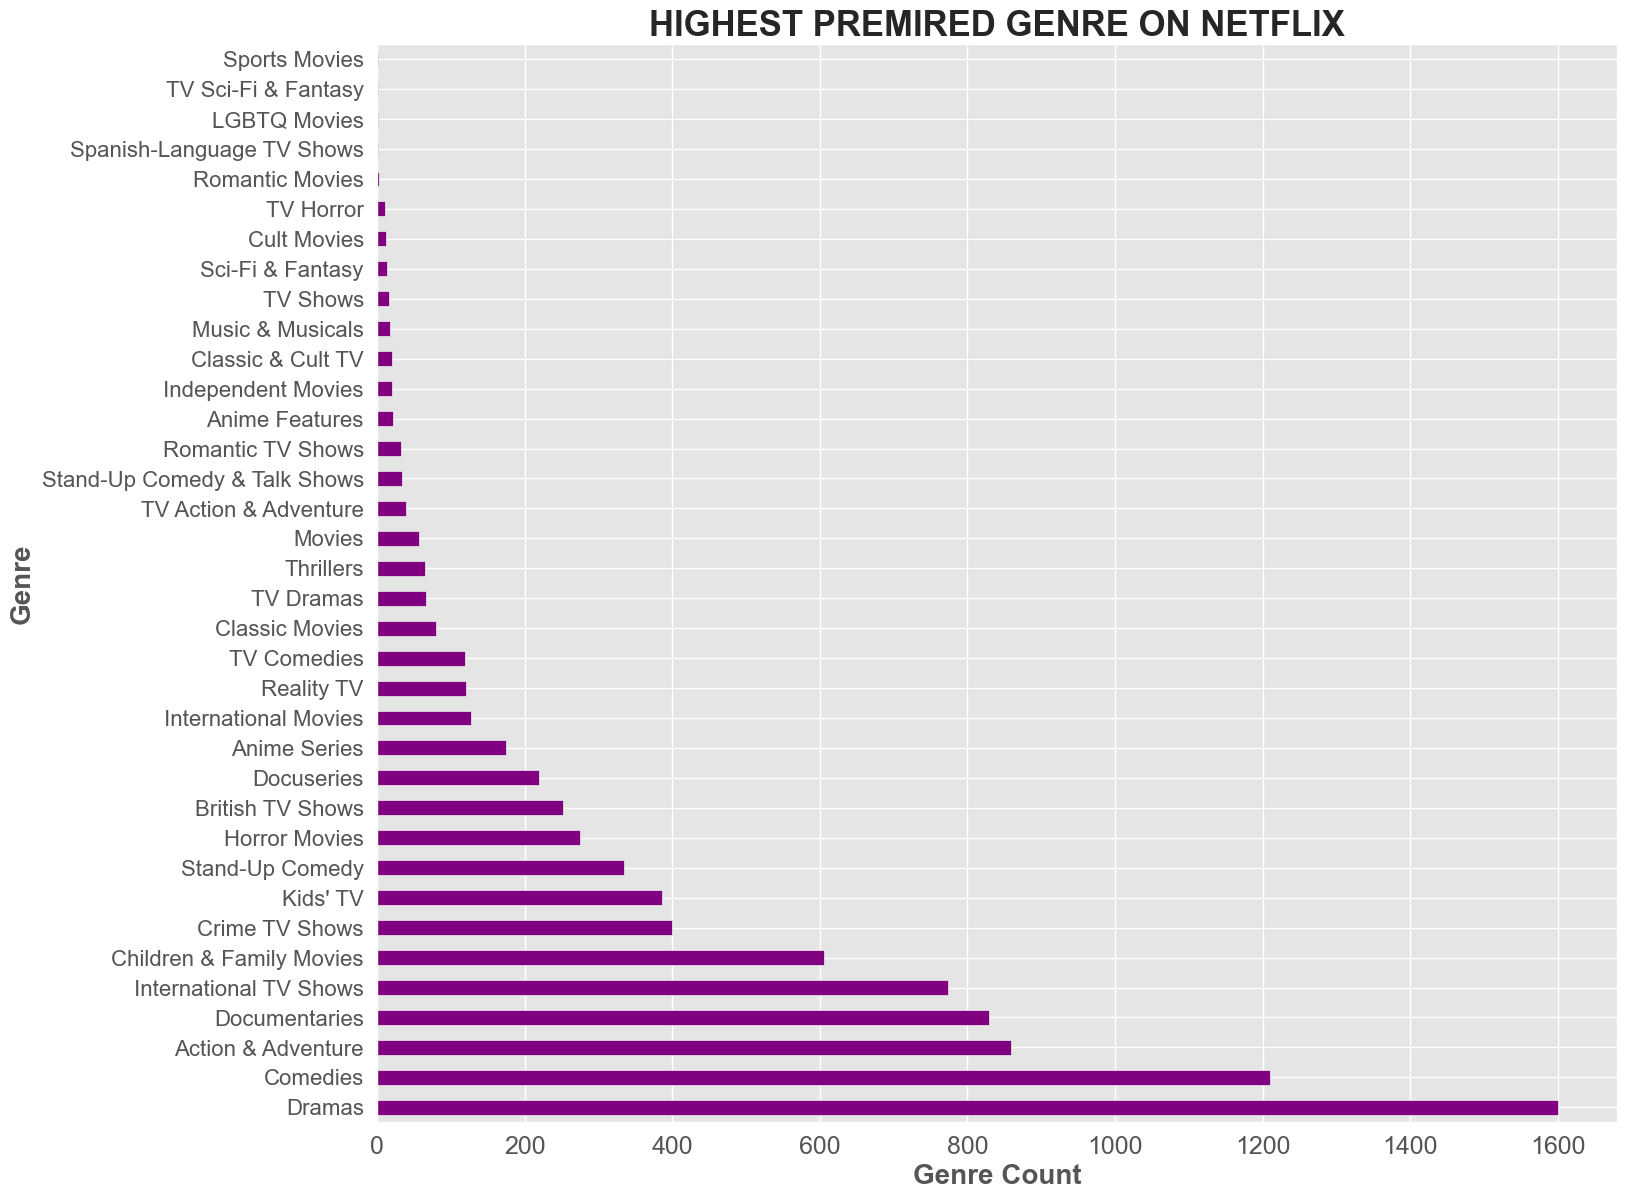

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(16,14))
ax = genre_count.plot(kind='barh', color='Purple')
ax.set_title('HIGHEST PREMIRED GENRE ON NETFLIX', size=25, fontweight='bold')
ax.set_xlabel('Genre Count', size=20,fontweight='bold')
ax.set_ylabel('Genre', size=20,fontweight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=18)
plt.show()

- Genre `Drama` is the highest premiered genre.

# Top Contributed Directors of Netflix

In [39]:
director_count = df['director'].value_counts().head(15)
director_count

missing                   2624
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            11
Don Michael Paul            10
David Dhawan                 9
Yılmaz Erdoğan               8
Quentin Tarantino            8
Name: director, dtype: int64

In [40]:
# Excluding the missing directors
exclude = ['missing']
mask = df['director'].isin(exclude)
directors = df.loc[~mask]
top_directors = directors['director'].value_counts().head(15)
top_directors

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Lance Bangs                8
Kunle Afolayan             8
Name: director, dtype: int64

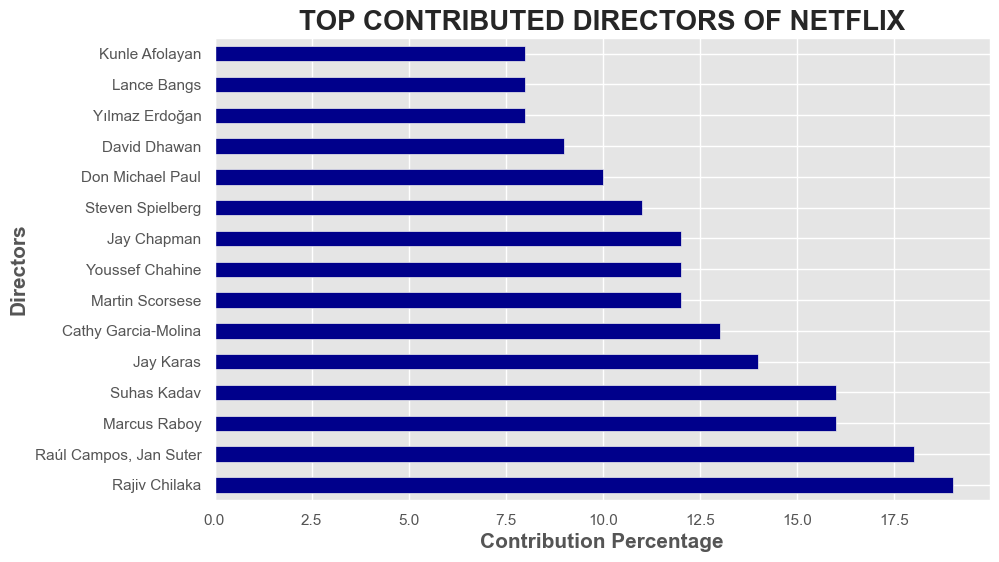

In [41]:
plt.figure(figsize=(10,6))
ax = top_directors.plot(kind='barh', color='darkblue')
ax.set_title('TOP CONTRIBUTED DIRECTORS OF NETFLIX', fontweight='bold', size=20)
ax.set_ylabel('Directors', fontweight='bold', size=15)
ax.set_xlabel('Contribution Percentage', fontweight='bold', size=15)
plt.show()

- Director `Rajiv Chilaka` is the most contributed director.

# 🎥 Summary and Conclusion

We did exploratory data analysis on Netflix Movie Data. We found the following insights from it -

1. The Number of `Movies` is quite high as compared to `TV Shows`.
2. The highest number of `Movies` premiered in `2019` is `1424` and `TV Shows` in `2020` is `594`.
3. The highest number of shows are from `USA`, followed by `India`.
4. Most of the Content in Netflix is rated `TV-MA`.
5. Genre `Drama` is the highest premiered genre.
6. Director `Rajiv Chilaka` is the most contributed director.

# 🎥 THE END